In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.datasets import load_digits

In [2]:
load_digits

<function sklearn.datasets.base.load_digits>

In [3]:
data = load_digits()

In [4]:
data.keys()

dict_keys(['data', 'DESCR', 'target_names', 'images', 'target'])

In [5]:
labels = pd.Series(data['target'])
data = pd.DataFrame(data['data'])
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


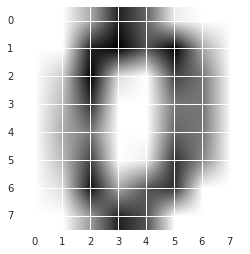

In [6]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap = 'gray_r')

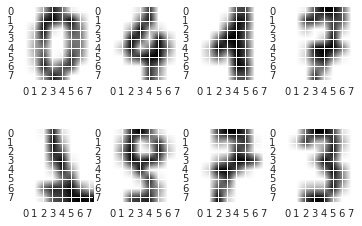

In [7]:
fig, axarr = plt.subplots(2,4)

axarr[0,0].imshow(data.iloc[0].values.reshape(8,8), cmap = 'gray_r')
axarr[0,1].imshow(data.iloc[100].values.reshape(8,8), cmap = 'gray_r')
axarr[0,2].imshow(data.iloc[200].values.reshape(8,8), cmap = 'gray_r')
axarr[0,3].imshow(data.iloc[300].values.reshape(8,8), cmap = 'gray_r')

axarr[1,0].imshow(data.iloc[1000].values.reshape(8,8), cmap = 'gray_r')
axarr[1,1].imshow(data.iloc[1100].values.reshape(8,8), cmap = 'gray_r')
axarr[1,2].imshow(data.iloc[1200].values.reshape(8,8), cmap = 'gray_r')
axarr[1,3].imshow(data.iloc[1300].values.reshape(8,8), cmap = 'gray_r')


## K-Nearest Neighbors 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

#50% train/test validation

def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_labels'] = test_labels
    train_test_df['predicted_labels'] = predictions
    overall_accuracy = sum(train_test_df['predicted_labels'] == train_test_df['correct_labels'])/len(train_test_df)
    return overall_accuracy

def cross_validation(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
        
    return fold_accuracies

knn_one_accuracy = cross_validation(1)
np.mean(knn_one_accuracy)
    

0.9677233358079684

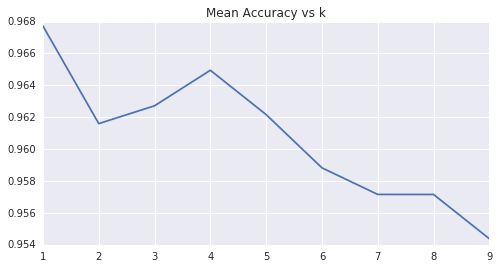

In [9]:
k_values = list(range(1,10))

k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validation(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs k')
plt.plot(k_values, k_overall_accuracies)

## Neural Network with One Hidden Layer

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

#50% train/test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_labels'] = test_labels
    train_test_df['predicted_labels'] = predictions
    overall_accuracy = sum(train_test_df['correct_labels'] == train_test_df['predicted_labels'])/len(train_test_df)
    return overall_accuracy

def cross_validation(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
        
    return fold_accuracies


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



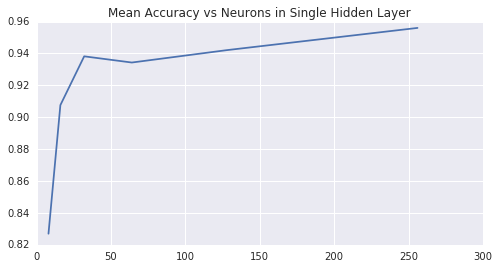

In [11]:
nn_one_neurons = [(8,),(16,),(32,),(64,),(128,),(256,)]

nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validation(n)
    mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(mean_accuracy)
    
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Neurons in Single Hidden Layer')

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

#### Summary

Adding more neurons to the single hidden layer helped to improve simple accuracy from approximately 86% to approximately 94%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

## Neural Network with Two Hidden Layers

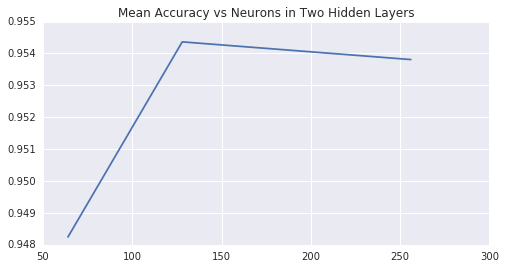

In [12]:
nn_one_neurons = [(64,64),(128,128),(256,256)]

nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validation(n)
    mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(mean_accuracy)
    
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Neurons in Two Hidden Layers')

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

#### Summary

Using 2 hidden layers improved simple accuracy to 95%. Using 4-fold cross validation also gives a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks tried earlier.

## Neural Network with Three Hidden Layers

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

#50% train/test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_labels'] = test_labels
    train_test_df['predicted_labels'] = predictions
    overall_accuracy = sum(train_test_df['correct_labels'] == train_test_df['predicted_labels'])/len(train_test_df)
    return overall_accuracy

def cross_validation(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state = 2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
        
    return fold_accuracies


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



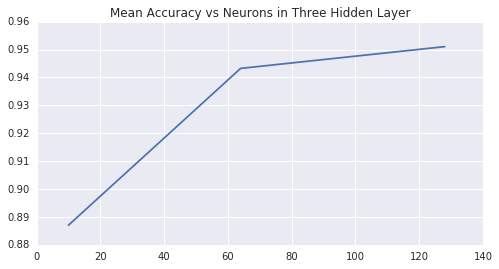

In [14]:
nn_one_neurons = [(10,10,10),(64,64,64),(128,128,128)]

nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validation(n)
    mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(mean_accuracy)
    
    
plt.figure(figsize=(8,4))
plt.title('Mean Accuracy vs Neurons in Three Hidden Layer')

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

In [15]:
nn_one_accuracies

[0.887032701597919, 0.9432311408398365, 0.9510237829803047]

#### Summary

Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. This seems to be in line with the research literature out there about deep neural networks for computer vision. Having more layers and more neurons tends to improve the network's performance.